# Зямзина Анастасия Сергеевна 3530903/70302 Задание 2.1 1 часть #
## 8 вариант ##

### Для заданного пользователя (совпадает с вашим номером в таблице) рассчитать оценки для всех фильмов, которые он не оценил ###

In [144]:
import numpy as np
import pandas as pd
import matplotlib
import math as m

Параметры для расчета метрики сходства

In [145]:
my_user = 8
variant = my_user-1
kNN = 4

In [146]:
data = pd.read_csv('data.csv')
data = data.drop(data.columns[0],axis = 1)
data = data.replace({-1:None})

In [147]:
sred_v = round(data.iloc[[variant]].mean(axis = 1),3)
print("Средняя оценка", sred_v)

Средняя оценка 7    3.292
dtype: float64


**Составим метрику сходства для пользователей**

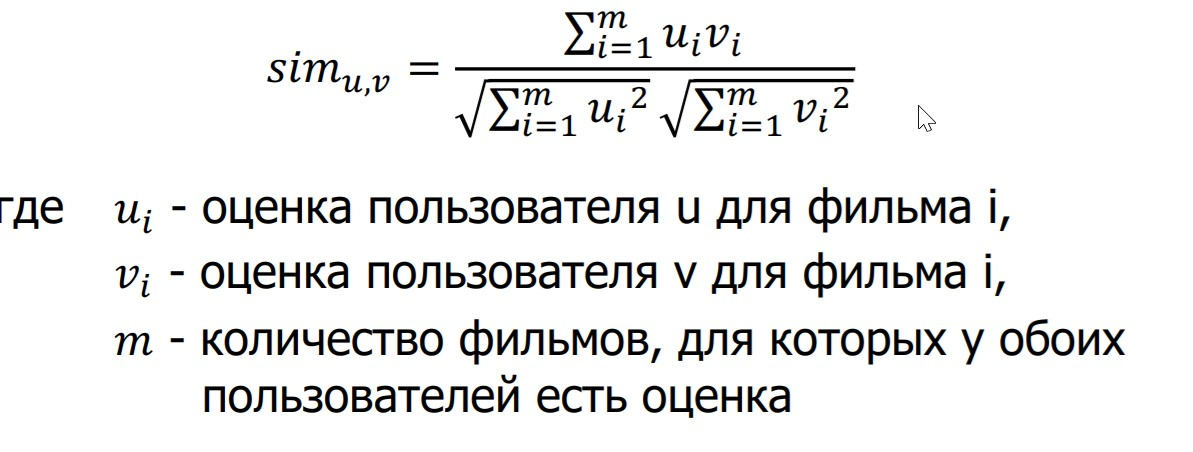

In [148]:
""" Для расчета метрики сходства был создан пустой масив Mat
    sum_p - числитель в выше рпедставленной формуле (сумма произведений оценок пользователей u, v)
    sum_u - левая часть произведения знаменателя - сумма квадратов оценок пользователя u
    sum_v - правая часть произведения знаменателя - сумма квадратов оценок пользователя v
"""
Mat = np.zeros((40,40)) 
data_to_eval = data.replace({None:0}).copy()
for user1 in range(40):
    for user2 in range(40):
        if(user1 != user2):
            sum_p = 0
            sum_u = 0
            sum_v = 0
            A = data_to_eval.iloc[lambda df: [user1,user2]].copy()
            for film in range(len(A.columns)):
                f_i = A[A.columns[film]].copy()
                if(int(f_i[user1]) != 0 and int(f_i[user2]) != 0):
                    sum_p = sum_p + int(f_i[user1]) * int(f_i[user2])
                    sum_u = sum_u + int(f_i[user1])**2 
                    sum_v = sum_v + int(f_i[user2])**2 
            sum_denumerator = m.sqrt(sum_u) * m.sqrt(sum_v)
            Mat[user1,user2] = round(sum_p / sum_denumerator,3)
print("Матрица сходства:\n",Mat)
print("Moй кортеж требуемых значений:\n", Mat[variant])
sim = Mat[variant]

Матрица сходства:
 [[0.    0.79  0.741 ... 0.891 0.745 0.83 ]
 [0.79  0.    0.742 ... 0.852 0.766 0.835]
 [0.741 0.742 0.    ... 0.812 0.806 0.729]
 ...
 [0.891 0.852 0.812 ... 0.    0.809 0.886]
 [0.745 0.766 0.806 ... 0.809 0.    0.799]
 [0.83  0.835 0.729 ... 0.886 0.799 0.   ]]
Moй кортеж требуемых значений:
 [0.812 0.896 0.756 0.837 0.8   0.907 0.849 0.    0.835 0.754 0.802 0.858
 0.747 0.835 0.857 0.875 0.81  0.823 0.887 0.88  0.814 0.742 0.785 0.838
 0.783 0.807 0.848 0.93  0.817 0.857 0.835 0.815 0.796 0.871 0.773 0.816
 0.832 0.774 0.814 0.799]


**Найдем индексы макисмальных значений (что и будет означать максимально похожих пользователей)**
>Mat.argpartition https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html

Функция расставит в порядке возрастания, а я отслайсирую последние 4

In [149]:
ind = np.argpartition(Mat[variant], -kNN)[-kNN:]
print("Индексы максимально похожих", kNN,"пользователей:",ind) 

Индексы максимально похожих 4 пользователей: [18  1  5 27]


#### Фильмы, у которых нет оценок ####

In [150]:
data = pd.read_csv('data.csv')
data = data.drop(data.columns[0],axis = 1)

In [151]:
data_for_variant = data.replace({-1:0}).copy()
data_for_variant = data_for_variant.iloc[variant]
films_to_evaluate = dict()
sum_m = dict()
for i in range(30):
    if data_for_variant.iloc[i] == 0:
        films_to_evaluate[i] = 0 
        sum_m[i] = 0
films_to_evaluate

{0: 0, 10: 0, 12: 0, 17: 0, 20: 0, 27: 0}

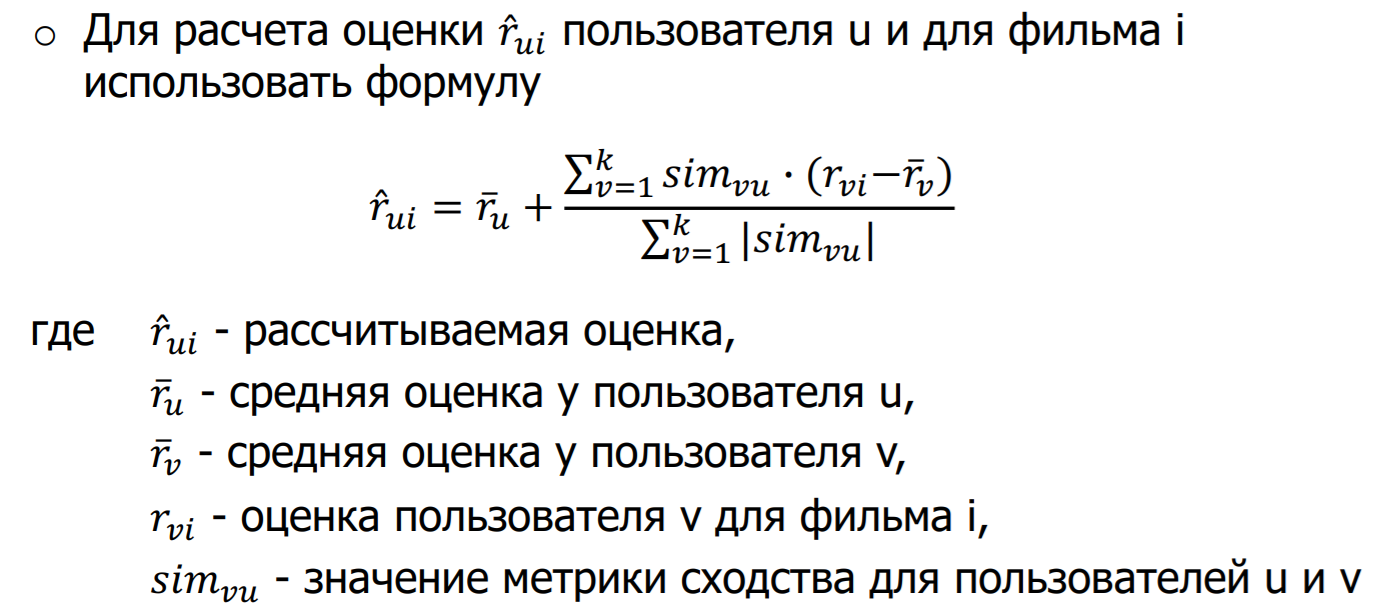

In [152]:
"""Для расчета оценки использовалась представленная выше формула.
   sum_m - сумма метрик сходства пользователей по каждрму фильму
   films_to_evaluate - словарь с индексами фильмов для оценки (не оценнеых прежде требуемым пользователем)
"""
sredv = sred_v[variant] 
data_to_get_sred = data.replace({-1:None}).copy()
for user1 in ind:
    dU = data_to_get_sred.iloc[[user1]] 
    sredu = round(dU.mean(axis = 1),3)
    sredu = sredu[user1] 
    for film in films_to_evaluate.keys():
        if(data.iloc[user1][film] != -1):
            sum_m[film] += sim[user1]
            films_to_evaluate[film] += sim[user1] * (data.iloc[user1][film] - sredu)
for i in films_to_evaluate.keys():
    films_to_evaluate[i] = round(sredv + round(films_to_evaluate[i] / abs(sum_m[i]),3),3)
print("Новые оценки для варианта:", films_to_evaluate)

Новые оценки для варианта: {0: 3.425, 10: 4.1, 12: 5.169, 17: 3.854, 20: 2.882, 27: 3.932}


In [153]:
names_for_films = data.iloc[variant].keys()
answer = dict()
for i in films_to_evaluate.keys():
    answer[names_for_films[i]] = films_to_evaluate[i]
answer

{' Movie 1': 3.425,
 ' Movie 11': 4.1,
 ' Movie 13': 5.169,
 ' Movie 18': 3.854,
 ' Movie 21': 2.882,
 ' Movie 28': 3.932}

## Выведение результатов в json ##

In [154]:
import json
res = json.dumps(answer, indent=4) 
result = json.loads(res)
with open('res.json', 'w') as fl:
    fl.write(json.dumps(result, indent=4) )